In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.sample(10, random_state=2024)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [4]:
df = df.drop_duplicates() #Borrar duplicados
df.shape

(891, 12)

In [5]:
df["PassengerId"].value_counts()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

In [6]:
df["Ticket"].value_counts(dropna=False)

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [7]:
df["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [8]:
df = df.drop(["PassengerId", "Name", "Ticket","Cabin"], axis=1)


In [14]:
df[df["Age"].isna()]["Survived"].sum()


TypeError: 'Categorical' with dtype category does not support reduction 'sum'

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
df["Survived"] = pd.Categorical(df["Survived"])
df["Pclass"] = pd.Categorical(df["Pclass"])
df["Sex"] = pd.Categorical(df["Sex"])
df["Embarked"] = pd.Categorical(df["Embarked"])


In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [34]:
df[df["Age"] == -1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,-1,0,0,8.4583,NaN,Q
17,1,2,male,-1,0,0,13.0000,NaN,S
19,1,3,female,-1,0,0,7.2250,NaN,C
26,0,3,male,-1,0,0,7.2250,NaN,C
28,1,3,female,-1,0,0,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,male,-1,0,0,7.2292,NaN,C
863,0,3,female,-1,8,2,69.5500,NaN,S
868,0,3,male,-1,0,0,9.5000,NaN,S
878,0,3,male,-1,0,0,7.8958,NaN,S


In [35]:
df["Age"] = df["Age"].apply(lambda x : x if x >= 0 else np.nan)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  889 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 38.9 KB


In [18]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
df.describe(include='category').T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Sex,891,2,male,577
Embarked,889,3,S,644


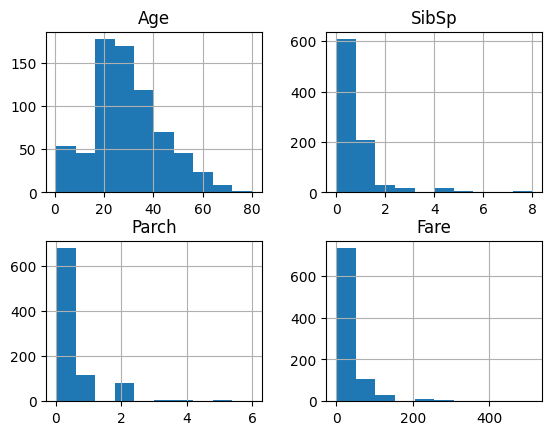

In [20]:
#Analisis univariado numerico
df.select_dtypes(include= np.number).hist()
plt.show()


<Axes: xlabel='Fare'>

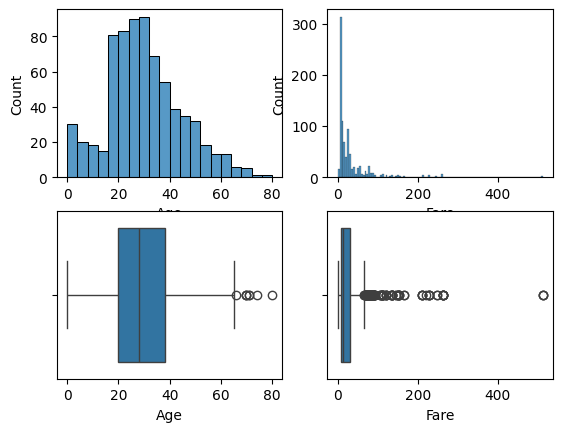

In [43]:
fig,axis = plt.subplots(2,2)
sns.histplot(ax=axis[0,0], data=df, x='Age')
sns.boxplot(ax=axis[1,0], data=df, x='Age')
sns.histplot(ax=axis[0,1], data=df, x='Fare')
sns.boxplot(ax=axis[1,1], data=df, x='Fare')

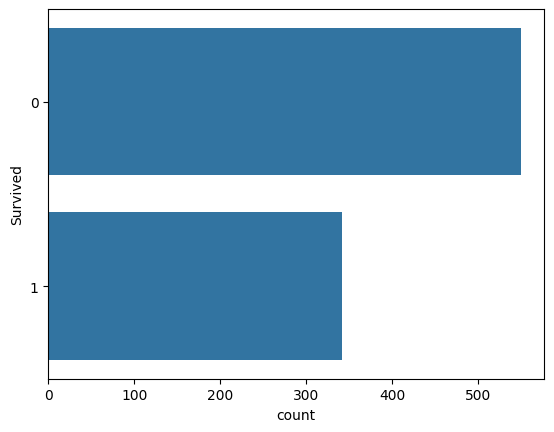

In [45]:
#Analisis univariado categorico

sns.countplot(data=df, y='Survived')
plt.show()

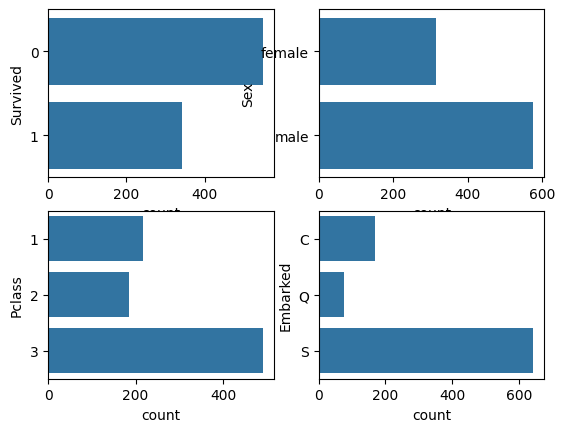

In [46]:
fig,axis = plt.subplots(2,2)
sns.countplot(ax=axis[0,0], data=df, y='Survived')
sns.countplot(ax=axis[1,0], data=df, y='Pclass')
sns.countplot(ax=axis[0,1], data=df, y='Sex')
sns.countplot(ax=axis[1,1], data=df, y='Embarked')
plt.show()

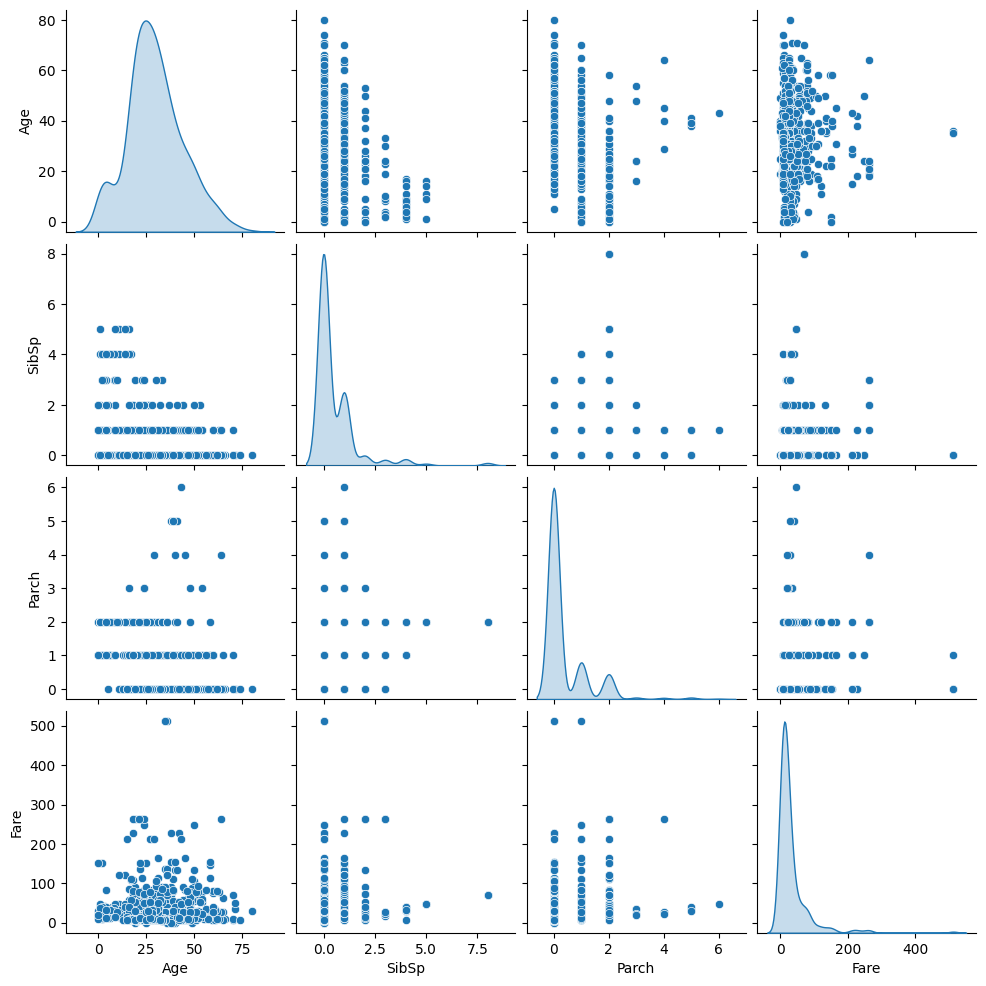

In [49]:
#Analis bivariado numerico vs numerico

sns.pairplot(data=df.select_dtypes(include= np.number), diag_kind='kde')
plt.show()

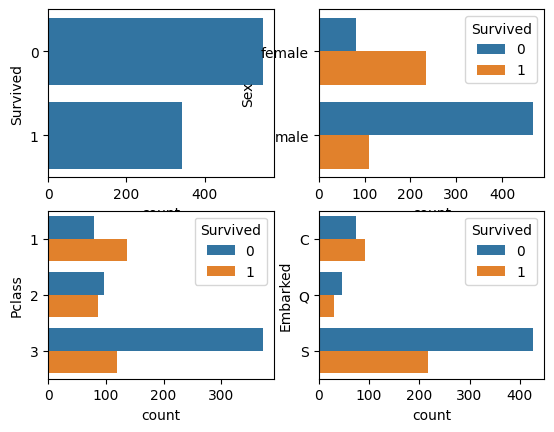

In [50]:
#Analisis bivariado categorico vs categorico

fig,axis = plt.subplots(2,2)
sns.countplot(ax=axis[0,0], data=df, y='Survived')
sns.countplot(ax=axis[1,0], data=df, y='Pclass', hue='Survived')
sns.countplot(ax=axis[0,1], data=df, y='Sex', hue='Survived')
sns.countplot(ax=axis[1,1], data=df, y='Embarked', hue='Survived')
plt.show()

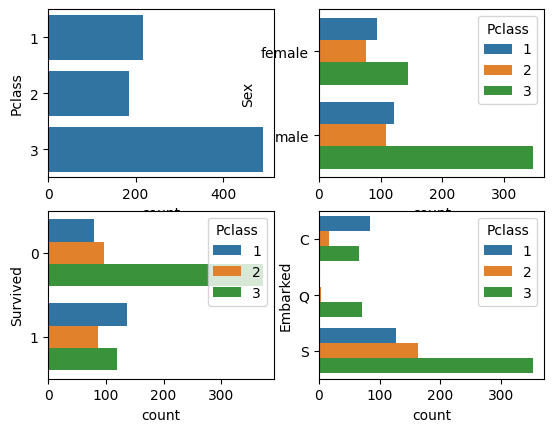

In [51]:
fig,axis = plt.subplots(2,2)
sns.countplot(ax=axis[0,0], data=df, y='Pclass')
sns.countplot(ax=axis[1,0], data=df, y='Survived', hue='Pclass')
sns.countplot(ax=axis[0,1], data=df, y='Sex', hue='Pclass')
sns.countplot(ax=axis[1,1], data=df, y='Embarked', hue='Pclass')
plt.show()

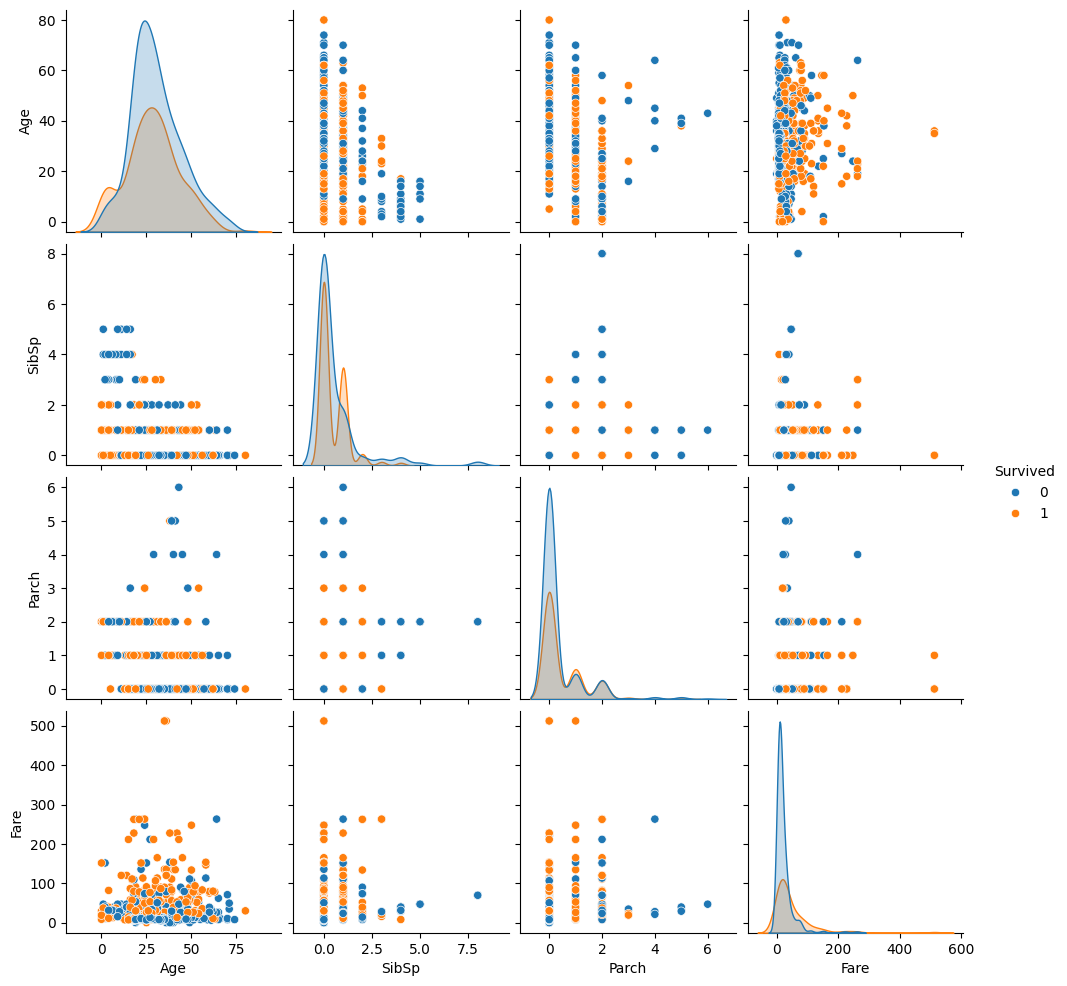

In [52]:
#Analis bivariado numerico vs categorico

sns.pairplot(data=df, hue='Survived', diag_kind='kde')
plt.show()

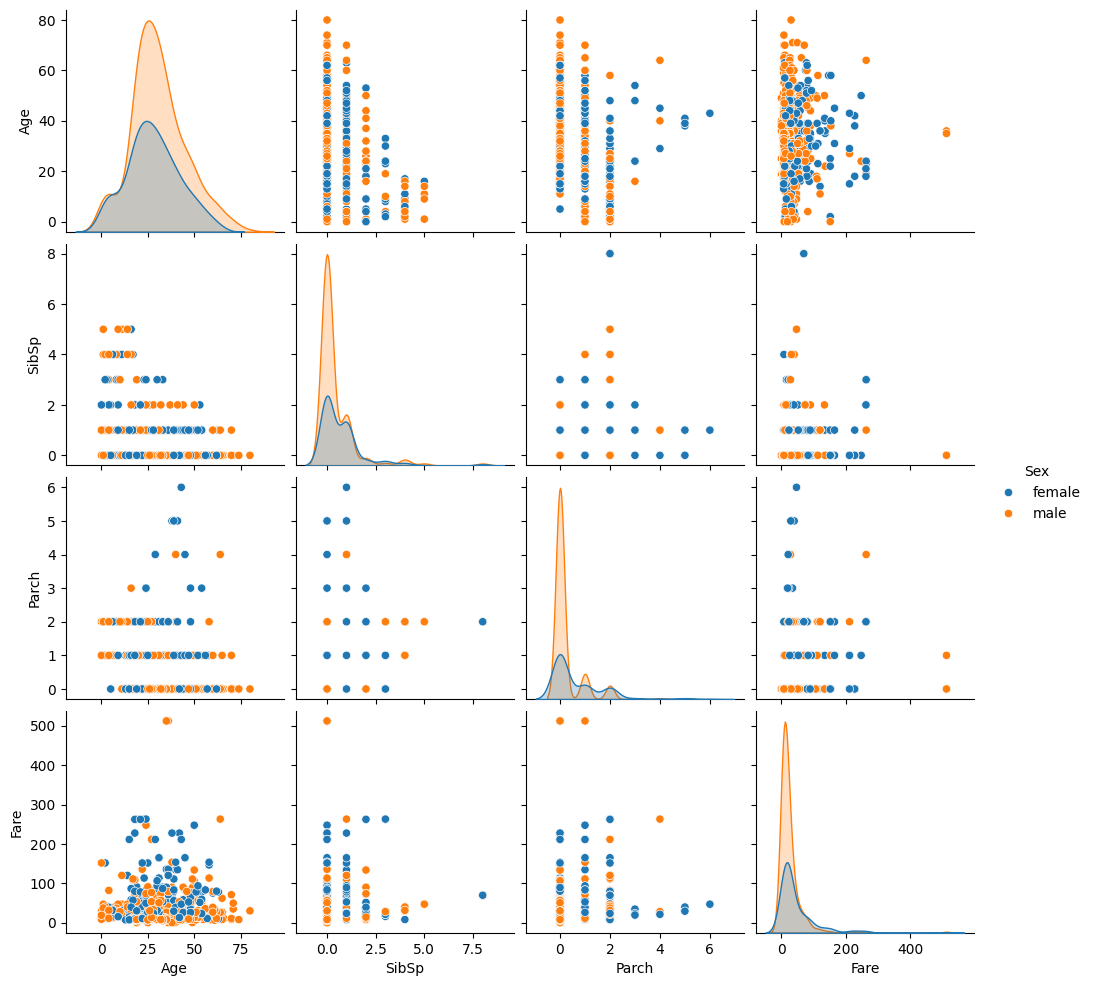

In [53]:
sns.pairplot(data=df, hue='Sex', diag_kind='kde')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [40]:
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == 'female' else 1)
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})
df["Embarked"] = pd.Categorical(df["Embarked"])
df_train, df_test = train_test_split(df,random_state=2024, test_size=0.2)

In [42]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 618 to 648
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    category
 1   Pclass    712 non-null    category
 2   Sex       712 non-null    int64   
 3   Age       569 non-null    float64 
 4   SibSp     712 non-null    int64   
 5   Parch     712 non-null    int64   
 6   Fare      712 non-null    float64 
 7   Embarked  0 non-null      category
dtypes: category(3), float64(2), int64(3)
memory usage: 35.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 829 to 161
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  179 non-null    category
 1   Pclass    179 non-null    category
 2   Sex       179 non-null    int64   
 3   Age       145 non-null    float64 
 4   SibSp     179 non-null    int64   
 5   Parch     179 non-null    int64   
 6   Fare      179 non-null    float64 
 7   Embarked  0 non-null      category
dtypes: category(3), float64(2), int64(3)
memory usage: 9.3 KB


None

In [43]:
display(df_train.sample(6))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
110,0,1,1,47.0,0,0,52.0000,NaN
691,1,3,1,4.0,0,1,13.4167,NaN
670,1,2,1,40.0,1,1,39.0000,NaN
156,1,3,1,16.0,0,0,7.7333,NaN
419,0,3,1,10.0,0,2,24.1500,NaN
10,1,3,1,4.0,1,1,16.7000,NaN


In [49]:
cat_cols = df_train.drop("Survived", axis=1).select_dtypes(include='category').columns
num_cols = df_train.drop("Survived", axis=1).select_dtypes(include='number').columns
cat_transformer = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ('onehotencoder', OneHotEncoder())    
    ]
)

num_transformer = Pipeline(
    steps=[
        ("num_impute",SimpleImputer(strategy='mean'))
    ]
)

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

encode = Pipeline(
    steps=[
        ('preprocessor', preprocessor)
    ]
)

In [35]:
df_train["Survived"].apply(lambda x: 1 if x == 1 else 0)

618    1
434    0
803    1
218    1
509    1
      ..
539    1
640    0
608    1
506    1
648    0
Name: Survived, Length: 712, dtype: category
Categories (2, int64): [0, 1]

In [47]:
clf = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('classifier', LogisticRegression())
    ]
)
clf.fit(df_train.drop("Survived", axis=1), df_train["Survived"].apply(lambda x: 1 if x == 1 else 0))

/workspaces/titanic/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Embarked']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/workspaces/titanic/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Pclass', 'Embarked'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [48]:
y_pred = clf.predict(df_test.drop("Survived", axis=1)) 

/workspaces/titanic/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Embarked']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [54]:
df.select_dtypes(include= np.number).corr() #Pearson correlation
#Cuando se acerca a uno(1) es una relacion lineal positiva. Cuando se acerca a menos uno(-1) es una relacion lineal negativa. 

,Age,SibSp,Parch,Fare
Age,1.000000,-0.307947,-0.189307,0.096288
SibSp,-0.307947,1.000000,0.414838,0.159651
Parch,-0.189307,0.414838,1.000000,0.216225
Fare,0.096288,0.159651,0.216225,1.000000


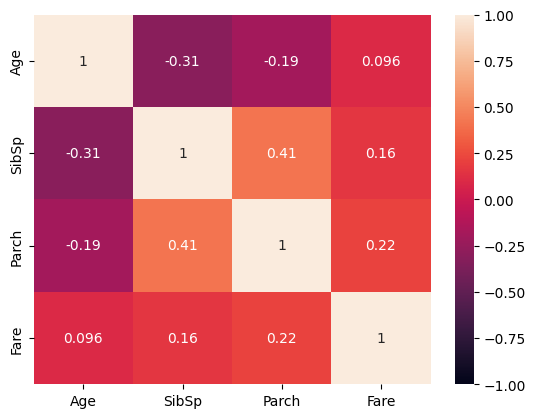

In [57]:
sns.heatmap(df.select_dtypes(include= np.number).corr(), vmin=-1,vmax=1, annot=True)
plt.show()


In [58]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [61]:
df = pd.DataFrame(X)
df["target"] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [62]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
68,59,1,4,170,326,0,2,140,1,3.4,3,0.0,7.0,2
131,51,1,3,94,227,0,0,154,1,0.0,1,1.0,7.0,0
169,45,0,2,112,160,0,0,138,0,0.0,2,0.0,3.0,0
42,71,0,2,160,302,0,0,162,0,0.4,1,2.0,3.0,0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1
272,46,1,4,140,311,0,0,120,1,1.8,2,2.0,7.0,2
110,61,0,4,145,307,0,2,146,1,1.0,2,0.0,7.0,1
100,45,1,4,115,260,0,2,185,0,0.0,1,0.0,3.0,0


In [63]:
df["sex"] = pd.Categorical(df["sex"])
df["cp"] = pd.Categorical(df["cp"])
df["fbs"] = pd.Categorical(df["fbs"])
df["restecg"] = pd.Categorical(df["restecg"])
df["exang"] = pd.Categorical(df["exang"])
df["slope"] = pd.Categorical(df["slope"])
df["thal"] = pd.Categorical(df["thal"])


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
 13  target    303 non-null    int64   
dtypes: category(7), float64(2), int64(5)
memory usage: 19.7 KB


In [67]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,299.0,0.672241,0.937438,0.0,0.0,0.0,1.0,3.0
target,303.0,0.937294,1.228536,0.0,0.0,0.0,2.0,4.0


In [68]:
df.describe(include='category').T

,count,unique,top,freq
sex,303.0,2.0,1.0,206.0
cp,303.0,4.0,4.0,144.0
fbs,303.0,2.0,0.0,258.0
restecg,303.0,3.0,0.0,151.0
exang,303.0,2.0,0.0,204.0
slope,303.0,3.0,1.0,142.0
thal,301.0,3.0,3.0,166.0


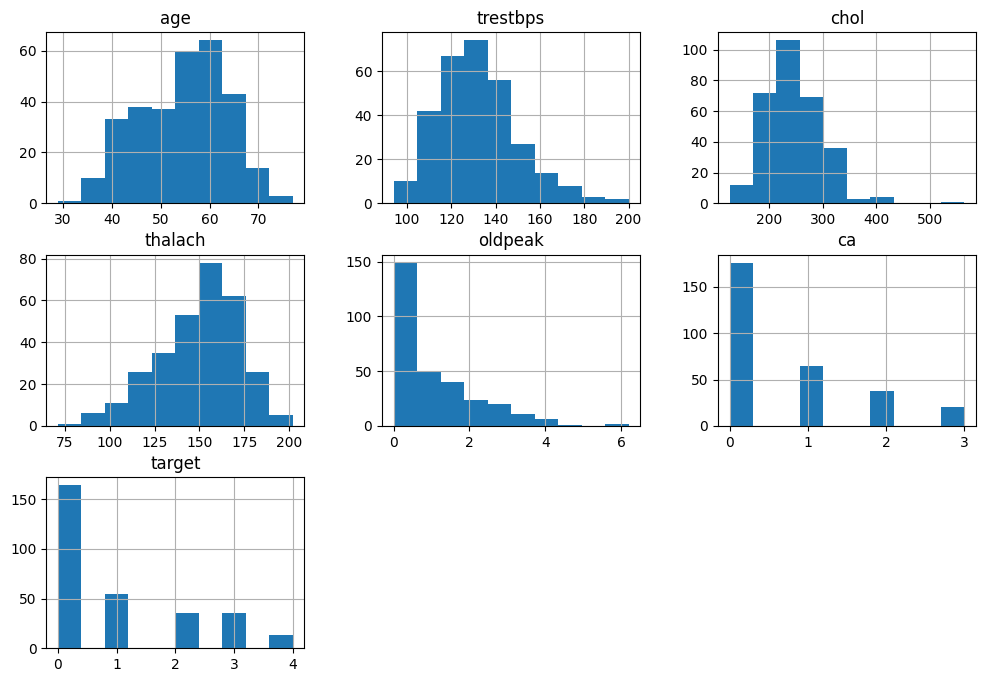

In [71]:
#Analisis variado numerico 
df.select_dtypes(include= np.number).hist(figsize=(12,8))
plt.show()

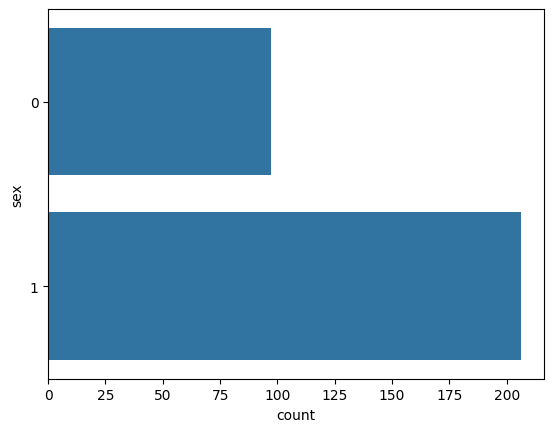

In [72]:
#Analisis univariado categorico

sns.countplot(data=df, y='sex')
plt.show()

<Axes: xlabel='chol'>

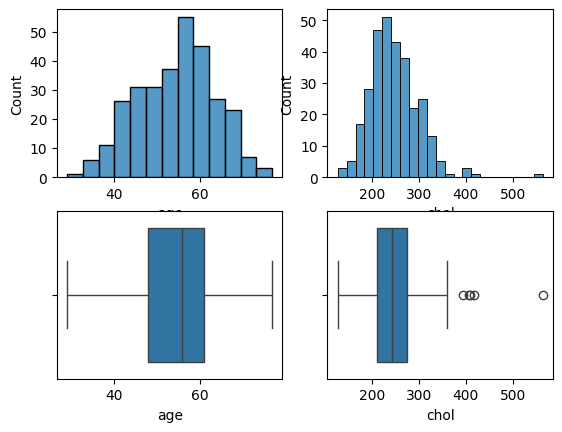

In [74]:
fig, axis = plt.subplots(2, 2)
sns.histplot(ax= axis[0, 0], data= df, x="age")
sns.boxplot(ax=axis[1, 0], data=df, x="age")
sns.histplot(ax= axis[0, 1], data= df, x="chol")
sns.boxplot(ax=axis[1, 1], data=df, x="chol")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
 13  target    303 non-null    int64   
dtypes: category(7), float64(2), int64(5)
memory usage: 19.7 KB
